# Includes


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

from copy                     import deepcopy

from sklearn.datasets         import make_blobs
from sklearn.metrics.pairwise import euclidean_distances


random.seed( 42 )     ## Set the random seed for reproducibility. 

data_s      = 20      ## How large are the points representing input examples in plots. 
centroid_s  = 50      ## How large are the points representing centroids in plots. 
scale       = 1.5     ## Scale up or down the figures

plt.rcParams["figure.figsize"] = [ 6.0 * scale, 4.0 * scale ]

%matplotlib inline


#Functions

##_init_centroids

Provides a way of initializing cluster centroids. Will randomly split the input examples and use the centroids of these random clusters as the initial cluster centroids. 

In [ ]:

def _init_centroids( num_centroids, X ) : 
  ## Make sure we do not modify the input examples "X"
  X = deepcopy( X )

  ## Randomly split -- Will depend on random seed.
  random.shuffle( X )  # without deepcopy, this will modify X
  split = len( X ) / num_centroids # elememnts per cluster
  random_clusters = [ X[int(round(split * i)): int(round(split * (i + 1)))] for i in range( num_centroids ) ] 

  ## Notice that move_to_centre requires "old" cluster centroids. 
  ##    We can pass an empty list because none of the clusters are emptly. 

  assert all( [ ( len( i ) != 0 ) for i in random_clusters ] ) ## Make sure none of the random_clusters are empty. 
  return move_to_centre( random_clusters, list() ) 



##cluster_assignment

Assigns each input example in X to a cluster centroid based on minimum distance.

In [ ]:
def cluster_assignment( centroids, X ) : 
  return np.argmin( euclidean_distances( X, centroids ), axis=1 )

## cluster_by_assignment

Creates clusters based on the assignments provided by the function *cluster_assignment*. 

In [ ]:
def cluster_by_assignment( assignments, X, num_clusters ) : 
  ## Init empty clusters
  clusters = [ list() for i in range(num_clusters) ]
  for index in range( len( X ) ) : 
    clusters[ assignments[ index ] ].append( X[ index ] ) ## This is what cluster_by_assignment returns. 

  for index in range( len( clusters ) ) : 
    if len( clusters[ index ] ) == 0 : 
      ## We have an emplty assignment! 
      clusters[ index ] = list()
    else : 
      ## create a numpy matrix from a list of lists so splicing becomes easier. 
      clusters[ index ] = np.stack( clusters[ index ] ) 
  return clusters


## move_to_centre

Calculate the centre (centroid) of clusters. 

Note that this is what the cluster centroids will be moved to. 

In [ ]:
def move_to_centre( clusters, centroids ) : 
  new_centroids = list()
  for index in range( len( clusters ) ) : 
    this_centroid = None
    if len( clusters[ index ] ) == 0 : 
      ## Deal with empty assignment - do not move centroid. 
      this_centroid = centroids[ index ]
    else : 
      this_centroid = np.mean(clusters[index], axis=0) 
    new_centroids.append( this_centroid ) 
  return new_centroids


## RSS

Function to calculate the RSS

In [ ]:
def RSS( clusters, centroids ) : 
  total_rss = 0
  for cluster_index in range( len( clusters ) ) : 
    ## create a matrix - one row is the centroid and we have as many rows as input examples in that cluster. 
    this_centroid = np.stack( [ centroids[ cluster_index ] for _ in range( len( clusters[ cluster_index ] ) ) ] ) 
    ## RSS of this cluster is added to the total
    total_rss += (( this_centroid - clusters[ cluster_index ]) ** 2).sum()
  return total_rss

## print_clusters

Function to print clusters. 

In [ ]:
def print_clusters( clusters, centroids, large_plot=False ) : 
  if large_plot: 
    plt.rcParams["figure.figsize"] = [ 6.0 * scale, 4.0 * scale ]
    plt.rcParams.update({'mathtext.default':  'regular' })
    plt.rcParams['figure.dpi']= 150
  for i, this_color in [ (0, "red"), (1, "green"), ( 2, "blue" ), ( 3, "yellow" ), ( 4, "black" ), ( 5, "lime" ), ( 6, "cyan" ), ( 7, "teal" ), ( 8, "deeppink" ), ( 8, "blueviolet" ) ][ : len(centroids ) ] : 
    plt.scatter(clusters [i][:,0], clusters[i][ :, 1 ], s=data_s, color=this_color)
    plt.scatter(centroids[i][0], centroids[i][1], s=centroid_s, marker="x", color=this_color)
    

In [ ]:
## Run this block to increase size and quality of plots
# plt.rcParams["figure.figsize"] = [ 6.0 * scale, 4.0 * scale ]
# plt.rcParams.update({'mathtext.default':  'default' })
# plt.rcParams.update({'font.size': 18})
# plt.rcParams['figure.dpi']= 150


# K-Means Illustration

This section provides an illustration of k-means and the program code associated with the examples in the chapter. 

## Data Initializing 

Initialize data and visualize it.


Text(0, 0.5, '$x_2$')

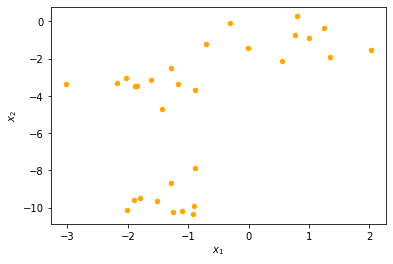

In [ ]:

X, y_true = make_blobs(n_samples=30, centers=3,
                       cluster_std=0.7, random_state=2)

plt.scatter(X[:, 0], X[:, 1], s=data_s, color="orange");
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


## Initialize centroids

Randomly initialize centroids and visualize data. 

Text(0, 0.5, '$x_2$')

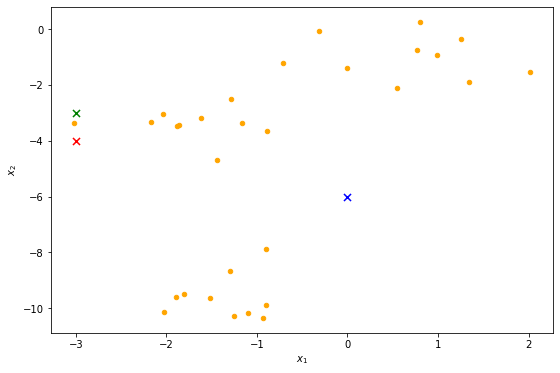

In [ ]:
centroids = [ (-3, -4), (-3, -3), (0, -6) ] 
plt.rcParams["figure.figsize"] = [ 6.0 * scale, 4.0 * scale ]
plt.scatter(X[:, 0], X[:, 1], s=data_s, color="orange");

for i, this_color in [ (0, "red"), (1, "green"), ( 2, "blue" ) ][ : len(centroids ) ] : 
  plt.scatter(centroids[i][0], centroids[i][1], s=centroid_s, marker="x", color=this_color);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


## Iteration 1: Cluster assignment

Text(0, 0.5, '$x_2$')

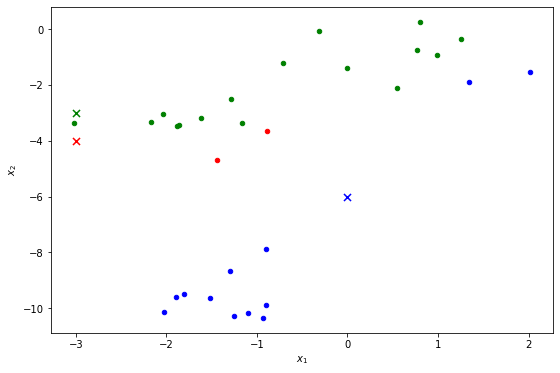

In [ ]:
assignments = cluster_assignment( centroids, X ) 
clusters = cluster_by_assignment( assignments, X, len( centroids ) ) 
print_clusters( clusters, centroids ) 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


## Iteration 1: Move Centroid

Text(0, 0.5, '$x_2$')

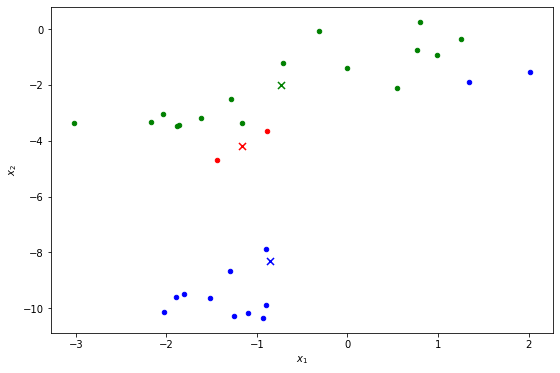

In [ ]:
centroids = move_to_centre( clusters, centroids ) 
print_clusters( clusters, centroids ) 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


## Iteration 2: Cluster assignment

Text(0, 0.5, '$x_2$')

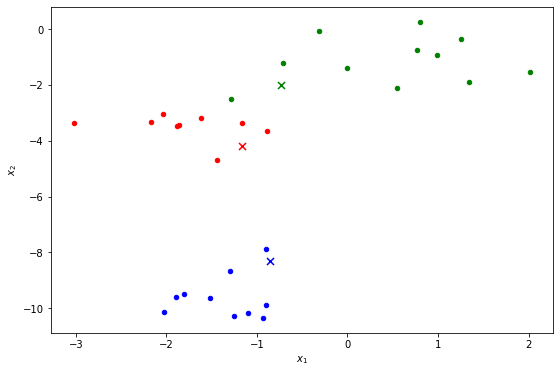

In [ ]:
assignments = cluster_assignment( centroids, X ) 
clusters = cluster_by_assignment( assignments, X, len( centroids ) ) 
print_clusters( clusters, centroids ) 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


## Iteration 2: Move centroid

Text(0, 0.5, '$x_2$')

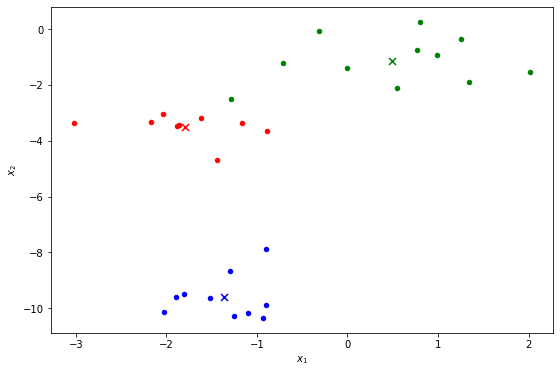

In [ ]:
centroids = move_to_centre( clusters, centroids ) 
print_clusters( clusters, centroids ) 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

## Iteration 3: Cluster assignment

Text(0, 0.5, '$x_2$')

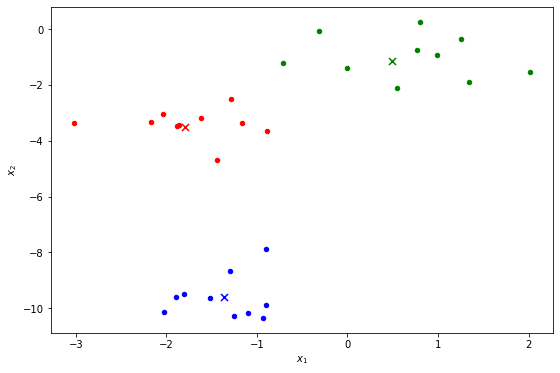

In [ ]:
assignments = cluster_assignment( centroids, X ) 
clusters = cluster_by_assignment( assignments, X, len( centroids ) ) 
print_clusters( clusters, centroids ) 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")



## Iteration 3: Move centroid

Text(0, 0.5, '$x_2$')

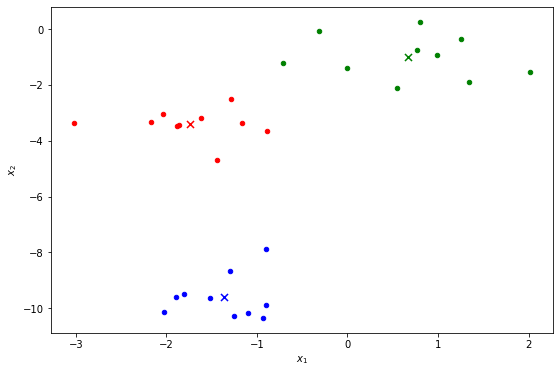

In [ ]:
centroids = move_to_centre( clusters, centroids ) 
print_clusters( clusters, centroids ) 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


# Solution to Exercise

## Data initalization and visualization

Initialize data as required. 

Text(0, 0.5, '$x_2$')

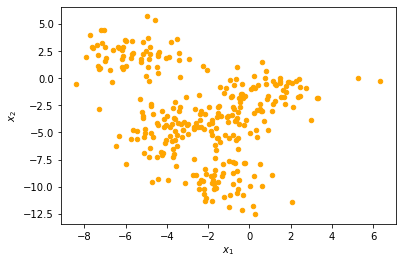

In [ ]:

X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=1.3, random_state=2)

plt.scatter(X[:, 0], X[:, 1], s=data_s, color="orange");
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


## K-means 

Run k-means over multiple number of centroids and multiple seeds to find the optimal solution. 


Number of centroids: 1
RSS across 10 runs:  [7189.829602806671, 7189.829602806671, 7189.829602806671, 7189.829602806671, 7189.829602806671, 7189.829602806671, 7189.829602806671, 7189.829602806671, 7189.829602806671, 7189.829602806671]
Picking clusters based on lowest RSS: 7189.829602806671
Visualize clusters with lowest RSS


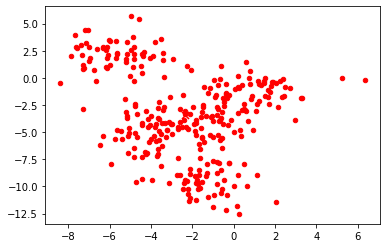


Number of centroids: 2
RSS across 10 runs:  [3837.4762410367684, 3837.4762410367684, 3837.4762410367684, 3837.4762410367684, 3837.4762410367684, 3837.4762410367684, 3893.488098819472, 3893.488098819472, 3893.488098819472, 3893.488098819472]
Picking clusters based on lowest RSS: 3837.4762410367684
Visualize clusters with lowest RSS


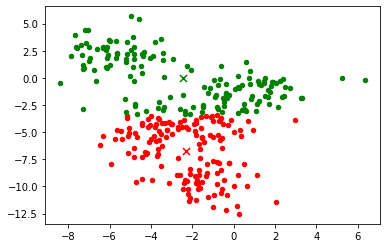


Number of centroids: 3
RSS across 10 runs:  [2044.6790566783368, 2044.6790566783368, 2044.6790566783368, 2044.7864997366078, 2066.3900491296263, 2067.3467260932075, 2067.3467260932075, 2067.346726093208, 2067.346726093208, 2092.984588391851]
Picking clusters based on lowest RSS: 2044.6790566783368
Visualize clusters with lowest RSS


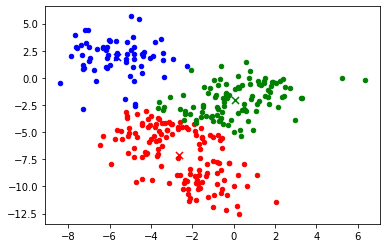


Number of centroids: 4
RSS across 10 runs:  [1165.3114622008543, 1166.2933342691495, 1166.2933342691495, 1166.2933342691495, 1166.2933342691495, 1166.2933342691495, 1166.2933342691495, 1166.2933342691497, 1169.6433936200779, 1169.6433936200779]
Picking clusters based on lowest RSS: 1165.3114622008543
Visualize clusters with lowest RSS


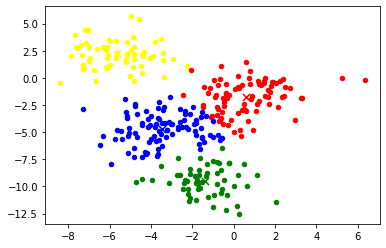


Number of centroids: 5
RSS across 10 runs:  [920.0814122254276, 920.0814122254277, 920.0814122254277, 920.0814122254277, 920.0814122254277, 920.0814122254277, 920.0814122254278, 920.0814122254278, 920.0814122254278, 920.0814122254278]
Picking clusters based on lowest RSS: 920.0814122254276
Visualize clusters with lowest RSS


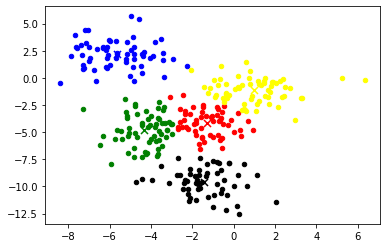


Number of centroids: 6
RSS across 10 runs:  [819.0414789197741, 819.7092673899054, 825.4108960012596, 825.4108960012597, 829.4160056326684, 830.8481359550096, 847.934163973764, 849.4258095071696, 853.2623961453573, 859.0347083518394]
Picking clusters based on lowest RSS: 819.0414789197741
Visualize clusters with lowest RSS


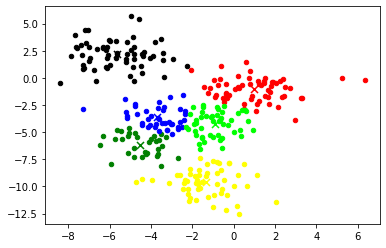


Number of centroids: 7
RSS across 10 runs:  [721.4960693350733, 723.7182205859425, 726.2703289273505, 729.0438607971462, 730.4334060256219, 751.4933721856344, 761.5245168664916, 770.0103139700595, 775.499979715872, 783.6585795804218]
Picking clusters based on lowest RSS: 721.4960693350733
Visualize clusters with lowest RSS


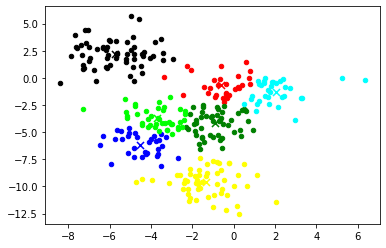


Number of centroids: 8
RSS across 10 runs:  [654.4566215752441, 666.1981468657428, 667.629606310424, 672.3388857103452, 677.1136252452296, 681.8307198175108, 684.0906318941725, 685.5834471084156, 686.2853349766951, 688.7543557696415]
Picking clusters based on lowest RSS: 654.4566215752441
Visualize clusters with lowest RSS


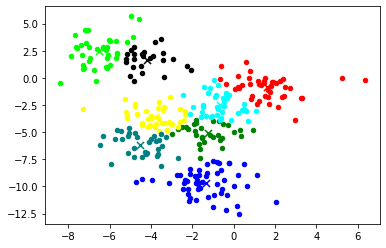


Number of centroids: 9
RSS across 10 runs:  [591.6966575446503, 594.6994852214307, 626.7885073219314, 627.4338509339384, 627.9601595411781, 630.3795832517558, 644.110850050107, 645.0763575933233, 646.5203110018115, 646.7184062616617]
Picking clusters based on lowest RSS: 591.6966575446503
Visualize clusters with lowest RSS


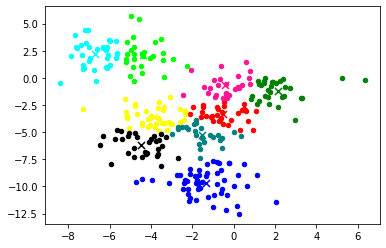


Number of centroids: 10
RSS across 10 runs:  [563.1861648377269, 577.6261884961926, 578.0138081710614, 585.3871349436108, 591.2616929533738, 591.9176744491206, 594.5962703610682, 594.7751742630177, 595.1690959551735, 610.757424129763]
Picking clusters based on lowest RSS: 563.1861648377269
Visualize clusters with lowest RSS


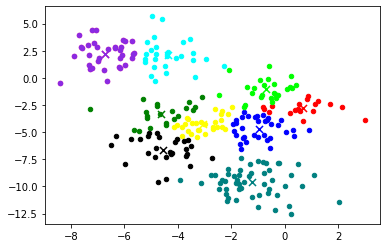

In [ ]:
results_by_num_centroids = list()
for num_centroids in range( 1, 11 ) : 
  seed_results = list()
  for seed in range( 10 ) : ## Run this across 10 random seeds. 
    random.seed( seed ) 
    centroids = _init_centroids( num_centroids, X ) 
    for iteration in range( 20 ) : ## Run k-means for a fixed number of iterations (i.e 20)
      assignments = cluster_assignment( centroids, X ) 
      clusters = cluster_by_assignment( assignments, X, len( centroids ) )
      centroids = move_to_centre( clusters, centroids ) 
    this_RSS = RSS( clusters, centroids )
    seed_results.append( [ this_RSS, clusters, centroids ] )
  
  ## Sort results by RSS
  seed_results.sort( key = lambda x : x[0] )

  ## Pick the result that has the lowest RSS and print it
  this_RSS, clusters, centroids = seed_results[0]
  print()
  print( "Number of centroids: {}".format( num_centroids ) )
  print( "RSS across 10 runs: ", [ i[0] for i in seed_results ] )
  print( "Picking clusters based on lowest RSS: {}".format( this_RSS ) )
  print( "Visualize clusters with lowest RSS" )
  print_clusters( clusters, centroids ) 
  plt.show()

  results_by_num_centroids.append( [ num_centroids, this_RSS, clusters, centroids ] ) 

 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Text(0, 0.5, 'RSS')

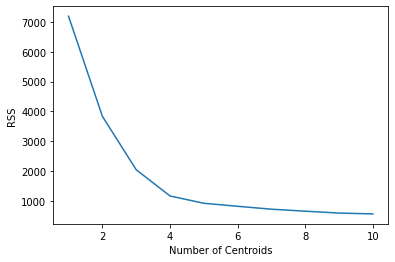

In [ ]:
## Plot the RSS by number of centroids to find the "elbow". 
results_by_num_centroids = np.array( results_by_num_centroids ) 
plt.plot( results_by_num_centroids[:, 0], results_by_num_centroids[:, 1] )
plt.xlabel("Number of Centroids")
plt.ylabel("RSS")


Chosen number of centroids: 4
Visualize final clustering


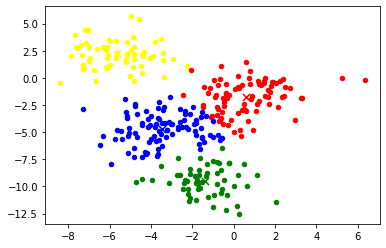

In [ ]:
## Best clustering at number of centroids = 4, based on elbow plot. 

[ num_centroids, this_RSS, clusters, centroids ] = results_by_num_centroids[3] 
print( "Chosen number of centroids: {}".format( num_centroids ) ) 
print( "Visualize final clustering" )
print_clusters( clusters, centroids ) 